<h1 class="sc-cZSric sc-boYqxe eNXgIn bvFneb"><span style="background-color: #2dc26b;"><strong>Heart Attack Dataset</strong></span></h1>

<div class="sc-UEtKG dGqiYy sc-flttKd cguEtd">
<div class="sc-fqwslf gsqkEc">
<div class="sc-cBQMlg kAHhUk">
<h2 class="sc-dcKlJK sc-cVttbi gqEuPW ksnHgj">About Dataset</h2>
</div>
</div>
</div>
<div class="sc-jgvlka jFuPjz">
<div class="sc-gzqKSP ktvwwo">
<div>
<div class="sc-etVRix kMRejg sc-bMmLMY ZURWJ">
<p>The heart attack datasets were collected at Zheen hospital in Erbil, Iraq, from January 2019 to May 2019. The attributes of this dataset are: age, gender, heart rate, systolic blood pressure, diastolic blood pressure, blood sugar, ck-mb and troponin with negative or positive output. According to the provided information, the medical dataset classifies either heart attack or none. The gender column in the data is normalized: the male is set to 1 and the female to 0. The glucose column is set to 1 if it is &gt; 120; otherwise, 0. As for the output, positive is set to 1 and negative to 0.</p>
<p>Institutions<br />University of Kurdistan Hewler</p>
<p>Categories<br />Medicine, Heart Disease</p>
<p>DOI: Rashid, Tarik A.; Hassan, Bryar (2022), &ldquo;Heart Attack Dataset&rdquo;, Mendeley Data, V1, doi: 10.17632/wmhctcrt5v.1</p>
</div>
</div>
</div>
</div>

<p><a title="Download DataSet" href="https://www.kaggle.com/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid/data">https://www.kaggle.com/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid/data</a></p>

<p><em>Importamos las librer&iacute;as necesarias</em></p>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from tpot import TPOTClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

## Funciones Auxiliares

In [6]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [7]:
#Remover la variable objetivo o predictora del particionado
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

## Lectura del conjunto de datos

In [8]:
df = pd.read_csv('Medicaldataset.csv')

## Visualización del conjunto de datos

In [9]:
df.head(10)

Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   
5   58       0          61                      112                        58   
6   32       0          40                      179                        68   
7   63       1          60                      214                        82   
8   44       0          60                      154                        81   
9   67       1          61                      160                        95   

   Blood sugar   CK-MB  Troponin    Result  
0        160.0    1.80     0.012  negative  
1        296.0    6.75     1.060  positive  
2        270.0    1.99     0.003  negative  
3        270.0   13.87     0.122  positive  
4        300.0    1.08     0.003  negative  
5         87.0    1.83     0.004  negative  
6        102.0    0.71     0.003  negative  
7         87.0  300.00     2.370  positive  
8        135.0    2.35     0.004  negative  
9        100.0    2.84     0.011  negative

In [10]:
#Observamos el dataset
df.describe()

Age       Gender   Heart rate  Systolic blood pressure  \
count  1319.000000  1319.000000  1319.000000              1319.000000   
mean     56.191812     0.659591    78.336619               127.170584   
std      13.647315     0.474027    51.630270                26.122720   
min      14.000000     0.000000    20.000000                42.000000   
25%      47.000000     0.000000    64.000000               110.000000   
50%      58.000000     1.000000    74.000000               124.000000   
75%      65.000000     1.000000    85.000000               143.000000   
max     103.000000     1.000000  1111.000000               223.000000   

       Diastolic blood pressure  Blood sugar        CK-MB     Troponin  
count               1319.000000  1319.000000  1319.000000  1319.000000  
mean                  72.269143   146.634344    15.274306     0.360942  
std                   14.033924    74.923045    46.327083     1.154568  
min                   38.000000    35.000000     0.321000     0.001000  
25%                   62.000000    98.000000     1.655000     0.006000  
50%                   72.000000   116.000000     2.850000     0.014000  
75%                   81.000000   169.500000     5.805000     0.085500  
max                  154.000000   541.000000   300.000000    10.300000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [12]:
#Buscamos si hay Desbalanceo de clases para tomar medidas
df["Result"].value_counts()

Result
positive    810
negative    509
Name: count, dtype: int64

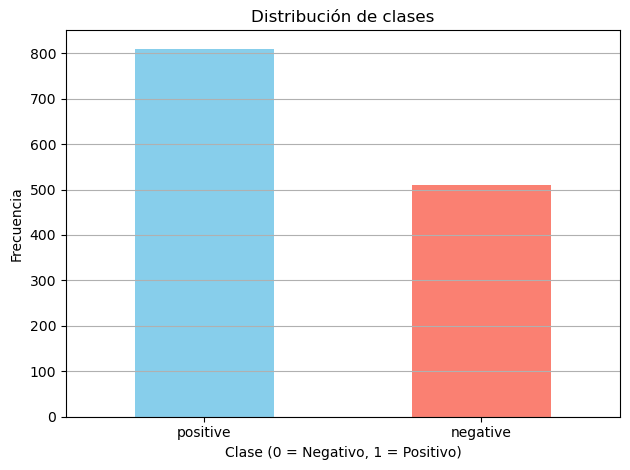

In [13]:
#Buscamos si hay desbalance de clases
df["Result"].value_counts().plot(kind='bar', color=["skyblue", "salmon"])
plt.title('Distribución de clases')
plt.xlabel('Clase (0 = Negativo, 1 = Positivo)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<p><em>No hay desbalance de clases</em></p>

In [14]:
# Transformamos la variable de salida a numérica para calcular correlaciones
X = df.copy()
X['Result'] = X['Result'].factorize()[0]

In [15]:
#Buscamos correlaciones y estudiamos el dataset para evitar la colinealidad
corr_matrix = X.corr()
corr_matrix["Result"].sort_values(ascending=False)

Result                      1.000000
Age                         0.238097
Troponin                    0.229376
CK-MB                       0.217720
Gender                      0.094432
Heart rate                  0.006920
Diastolic blood pressure   -0.009659
Systolic blood pressure    -0.020825
Blood sugar                -0.033059
Name: Result, dtype: float64

In [16]:
corr_matrix

Age    Gender  Heart rate  \
Age                       1.000000 -0.092874   -0.023440   
Gender                   -0.092874  1.000000   -0.026781   
Heart rate               -0.023440 -0.026781    1.000000   
Systolic blood pressure   0.017441  0.011065    0.010882   
Diastolic blood pressure  0.002614 -0.009370    0.108353   
Blood sugar              -0.004193  0.006668   -0.019584   
CK-MB                     0.018419  0.017527   -0.013001   
Troponin                  0.088800  0.065793    0.011180   
Result                    0.238097  0.094432    0.006920   

                          Systolic blood pressure  Diastolic blood pressure  \
Age                                      0.017441                  0.002614   
Gender                                   0.011065                 -0.009370   
Heart rate                               0.010882                  0.108353   
Systolic blood pressure                  1.000000                  0.586166   
Diastolic blood pressure                 0.586166                  1.000000   
Blood sugar                              0.020807                 -0.025614   
CK-MB                                   -0.016396                 -0.023403   
Troponin                                 0.043729                  0.043360   
Result                                  -0.020825                 -0.009659   

                          Blood sugar     CK-MB  Troponin    Result  
Age                         -0.004193  0.018419  0.088800  0.238097  
Gender                       0.006668  0.017527  0.065793  0.094432  
Heart rate                  -0.019584 -0.013001  0.011180  0.006920  
Systolic blood pressure      0.020807 -0.016396  0.043729 -0.020825  
Diastolic blood pressure    -0.025614 -0.023403  0.043360 -0.009659  
Blood sugar                  1.000000  0.045757  0.021069 -0.033059  
CK-MB                        0.045757  1.000000 -0.016008  0.217720  
Troponin                     0.021069 -0.016008  1.000000  0.229376  
Result                      -0.033059  0.217720  0.229376  1.000000

<h3 class="" data-start="124" data-end="181"><strong data-start="131" data-end="181">&iquest;Qu&eacute; pasa con la troponina durante un infarto?</strong></h3>
<p class="" data-start="183" data-end="432">Cuando ocurre un <strong data-start="200" data-end="219">ataque card&iacute;aco</strong>, una parte del m&uacute;sculo del coraz&oacute;n (miocardio) sufre da&ntilde;o porque no recibe suficiente ox&iacute;geno. Este da&ntilde;o hace que las c&eacute;lulas musculares se rompan y liberen su contenido en la sangre, incluyendo la <strong data-start="418" data-end="431">troponina</strong>.</p>
<table>
<thead>
<tr>
<th>Momento</th>
<th>Niveles de troponina</th>
</tr>
</thead>
<tbody>
<tr>
<td>0 horas (inicio del infarto)</td>
<td>Normales</td>
</tr>
<tr>
<td>3&ndash;6 horas despu&eacute;s</td>
<td><strong>Empiezan a elevarse</strong></td>
</tr>
<tr>
<td>12&ndash;24 horas</td>
<td><strong>Pico m&aacute;ximo</strong></td>
</tr>
<tr>
<td>5&ndash;10 d&iacute;as</td>
<td>Vuelven a valores normales</td>
</tr>
</tbody>
</table>
<p>Esto significa que <strong data-start="765" data-end="793">no se eleva de inmediato</strong>, sino que <strong data-start="804" data-end="834">hay que esperar unas horas</strong> despu&eacute;s del inicio del dolor en el pecho para que la prueba sea confiable.</p>
<p>El <strong data-start="3" data-end="12">CK-MB</strong> tambi&eacute;n se <strong data-start="24" data-end="61">eleva despu&eacute;s del da&ntilde;o al coraz&oacute;n</strong>, <strong data-start="63" data-end="75">no antes</strong>. Al igual que la troponina, <strong data-start="104" data-end="176">el CK-MB se libera cuando las c&eacute;lulas del m&uacute;sculo card&iacute;aco se rompen</strong>, lo cual ocurre <strong data-start="193" data-end="215">durante un infarto</strong>.</p>
<p>L&iacute;nea de tiempo del CK-MB tras un infarto:</p>
<table>
<thead>
<tr>
<th>Tiempo desde el infarto</th>
<th>Niveles de CK-MB</th>
</tr>
</thead>
<tbody>
<tr>
<td>0 horas</td>
<td>Normales</td>
</tr>
<tr>
<td>3&ndash;6 horas</td>
<td><strong>Empieza a elevarse</strong></td>
</tr>
<tr>
<td>12&ndash;24 horas</td>
<td><strong>Pico m&aacute;ximo</strong></td>
</tr>
<tr>
<td>2&ndash;3 d&iacute;as</td>
<td>Vuelve a lo normal</td>
</tr>
</tbody>
</table>
<p><strong>Conclusi&oacute;n:</strong> Caso de Target leakage&nbsp;</p>
<p>Target leakage ocurre cuando usas en el modelo informaci&oacute;n que no estar&iacute;a disponible en el momento en que necesitas hacer la predicci&oacute;n. Es decir, el modelo est&aacute; &ldquo;haciendo trampa&rdquo; porque accede a datos que en la vida real solo existir&iacute;an despu&eacute;s de saber el resultado que est&aacute; intentando predecir.</p>

<table>
<thead>
<tr>
<th>Variable</th>
<th>Disponible antes del infarto</th>
<th>Comentario</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Age</strong></td>
<td>✅ S&iacute;</td>
<td>No cambia; siempre se conoce.</td>
</tr>
<tr>
<td><strong>Gender</strong></td>
<td>✅ S&iacute;</td>
<td>Informaci&oacute;n demogr&aacute;fica fija.</td>
</tr>
<tr>
<td><strong>Heart rate</strong></td>
<td>✅ S&iacute;, en general</td>
<td>Puede medirse en cualquier momento, incluso al ingreso o durante s&iacute;ntomas.</td>
</tr>
<tr>
<td><strong>Systolic blood pressure</strong></td>
<td>✅ S&iacute;</td>
<td>Se mide f&aacute;cilmente antes del infarto.</td>
</tr>
<tr>
<td><strong>Diastolic blood pressure</strong></td>
<td>✅ S&iacute;</td>
<td>Igual que la sist&oacute;lica.</td>
</tr>
<tr>
<td><strong>Blood sugar</strong></td>
<td>✅ S&iacute;</td>
<td>Se puede conocer antes del infarto; importante en pacientes con diabetes.</td>
</tr>
<tr>
<td><strong>CK-MB</strong></td>
<td>❌ No</td>
<td>Se eleva despu&eacute;s del da&ntilde;o card&iacute;aco &rarr; <em>leakage</em>.</td>
</tr>
<tr>
<td><strong>Troponin</strong></td>
<td>❌ No</td>
<td>Se eleva solo despu&eacute;s del da&ntilde;o &rarr; <em>leakage</em>.</td>
</tr>
</tbody>
</table>

## Transformación, creación y entrenamiento del modelo.

**División del conjunto de datos**

In [19]:
df = df.drop(columns=['CK-MB', 'Troponin'])

In [48]:
# Dividimos el conjunto de datos 
train_set, val_set, test_set = train_val_test_split(df)

In [22]:
#removemos la variable objetivo  y los features o caracteristicas
X_train, y_train = remove_labels(train_set, 'Result')
X_val, y_val = remove_labels(val_set, 'Result')
X_test, y_test = remove_labels(test_set, 'Result')

**Creacion del Modelo Usando Baseline TDOT**

In [51]:
#Crear el baseline con TPOT
# Usamos pocas generaciones y población pequeña para demo rápida
tpot = TPOTClassifier(generations=10, population_size=40, verbosity=0, random_state=42)

**Entranamos al Modelo**

In [53]:
#Ajustar el modelo con los datos de entrenamiento
tpot.fit(X_train, y_train)

Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


TPOTClassifier(generations=10, population_size=40, random_state=42)

<p data-start="0" data-end="204">Este bloque de c&oacute;digo crea un modelo automatizado con TPOTClassifier, una herramienta de AutoML que utiliza algoritmos gen&eacute;ticos para encontrar el mejor pipeline de machine learning. Se configur&oacute; con:</p>
<ul data-start="206" data-end="481">
<li data-start="206" data-end="285">
<p data-start="208" data-end="285"><strong>generations=10</strong>: n&uacute;mero de generaciones evolutivas para optimizar el modelo.</p>
</li>
<li data-start="286" data-end="358">
<p data-start="288" data-end="358"><strong>population_size=40</strong>: cu&aacute;ntas combinaciones prueba en cada generaci&oacute;n.</p>
</li>
<li data-start="359" data-end="429">
<p data-start="361" data-end="429"><strong>verbosity=0:</strong> sin mostrar informaci&oacute;n en consola (modo silencioso).</p>
</li>
<li data-start="430" data-end="481">
<p data-start="432" data-end="481"><strong>random_state=42:</strong> para resultados reproducibles.</p>
</li>
</ul>
<p data-start="483" data-end="575">Es una configuraci&oacute;n ligera pensada para obtener resultados r&aacute;pidos en pruebas preliminares.</p>

**Descripción del Pipeline, Modelo e Hiperparámetros**

In [54]:
print(tpot.fitted_pipeline_)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=17,
                                        min_samples_split=7,
                                        random_state=42))])


## Evaluación del Modelo

**Predicción y evaluación con el subconjunto de entrenamiento**

In [55]:
#Predecimos los valores de entrenamiento para  evaluar si hay Overffiting
y_pred = tpot.predict(X_train)

In [56]:
# Classification report completo
print("\nClassification Report:")
print(classification_report(y_train, y_pred, target_names=['Clase 0', 'Clase 1']))


Classification Report:
              precision    recall  f1-score   support

     Clase 0       0.60      0.35      0.44       306
     Clase 1       0.67      0.85      0.75       485

    accuracy                           0.66       791
   macro avg       0.64      0.60      0.60       791
weighted avg       0.65      0.66      0.63       791



**Predicción y evaluación con el subconjunto de validacion**

In [57]:
y_pred = tpot.predict(X_val)

In [58]:
# Classification report completo
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Clase 0', 'Clase 1']))


Classification Report:
              precision    recall  f1-score   support

     Clase 0       0.67      0.39      0.49       106
     Clase 1       0.68      0.87      0.76       158

    accuracy                           0.68       264
   macro avg       0.68      0.63      0.63       264
weighted avg       0.68      0.68      0.65       264



**Predicción y evaluación con el subconjunto de Prueba**

In [59]:
y_pred = tpot.predict(X_test)

In [60]:
# Classification report completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Clase 0', 'Clase 1']))


Classification Report:
              precision    recall  f1-score   support

     Clase 0       0.55      0.31      0.39        97
     Clase 1       0.68      0.85      0.76       167

    accuracy                           0.65       264
   macro avg       0.61      0.58      0.58       264
weighted avg       0.63      0.65      0.62       264



<p data-start="459" data-end="480"><strong data-start="459" data-end="480">An&aacute;lisis general:</strong></p>
<ul data-start="482" data-end="1325">
<li data-start="482" data-end="645">
<p data-start="484" data-end="645">La <strong data-start="487" data-end="511">exactitud (accuracy)</strong> del modelo est&aacute; en torno al 65-68% en los tres conjuntos, indicando una capacidad moderada para clasificar correctamente ambos casos.</p>
</li>
<li data-start="646" data-end="866">
<p data-start="648" data-end="866">La <strong data-start="651" data-end="682">Clase 1 (ataque al coraz&oacute;n)</strong> se detecta mejor que la Clase 0 en t&eacute;rminos de recall (0.85 en entrenamiento, 0.87 validaci&oacute;n, 0.85 prueba), lo que significa que el modelo identifica bien a los pacientes con ataque.</p>
</li>
<li data-start="867" data-end="1042">
<p data-start="869" data-end="1042">Sin embargo, la <strong data-start="885" data-end="909">Clase 0 (sin ataque)</strong> tiene un recall bajo (0.31 a 0.39), es decir, muchos falsos negativos: el modelo no reconoce tan bien a los que no sufrieron ataque.</p>
</li>
<li data-start="1043" data-end="1162">
<p data-start="1045" data-end="1162">El F1-score refleja este desequilibrio, siendo mayor para la Clase 1 (0.75-0.76) y menor para la Clase 0 (0.39-0.49).</p>
</li>
<li data-start="1163" data-end="1325">
<p data-start="1165" data-end="1325">El <em data-start="1168" data-end="1183">macro average</em> y <em data-start="1186" data-end="1204">weighted average</em> oscilan en torno a 0.58-0.65, mostrando que el desempe&ntilde;o global est&aacute; influenciado por la mejor predicci&oacute;n de la Clase 1.</p>
</li>
</ul>
<p data-start="1327" data-end="1348"><strong data-start="1327" data-end="1348">Contexto cl&iacute;nico:</strong></p>
<ul data-start="1350" data-end="1760">
<li data-start="1350" data-end="1454">
<p data-start="1352" data-end="1454">Detectar correctamente los casos positivos (ataques) es cr&iacute;tico, y el modelo cumple bien en esta &aacute;rea.</p>
</li>
<li data-start="1455" data-end="1651">
<p data-start="1457" data-end="1651">Sin embargo, el bajo recall en la Clase 0 implica que hay riesgo de clasificar err&oacute;neamente personas sin ataque como enfermas, lo que puede afectar falsos positivos y la confianza en el sistema.</p>
</li>
<li data-start="1652" data-end="1760">
<p data-start="1654" data-end="1760">El balance entre sensibilidad y especificidad debe mejorarse para evitar estos falsos positivos excesivos.</p>
</li>
</ul>

<p><strong>Conclusi&oacute;n Final:</strong></p>
<p>El modelo entrenado para predecir ataques card&iacute;acos en este conjunto de datos cl&iacute;nicos muestra una capacidad razonable para identificar correctamente a los pacientes que sufrieron un ataque (alta sensibilidad para Clase 1). Sin embargo, su desempe&ntilde;o para reconocer a los pacientes sin ataque es limitado, con un bajo recall en Clase 0 que indica un n&uacute;mero considerable de falsos positivos.</p>
<p>Esto sugiere que, aunque el modelo puede ser &uacute;til como herramienta de detecci&oacute;n inicial para pacientes en riesgo, se requiere optimizar para reducir la tasa de falsos positivos y lograr un mejor equilibrio en la clasificaci&oacute;n.</p>
<h3 data-start="131" data-end="153">Conclusi&oacute;n T&eacute;cnica</h3>
<p data-start="155" data-end="713">Este proyecto asumi&oacute; como reto personal desarrollar un modelo predictivo robusto a pesar de las limitaciones del dataset, tanto en volumen de datos como en la eliminaci&oacute;n de variables altamente predictivas. Se decidi&oacute; excluir deliberadamente las caracter&iacute;sticas <strong data-start="417" data-end="426">CK-MB</strong> y <strong data-start="429" data-end="441">Troponin</strong>, a pesar de representar alrededor del <strong data-start="480" data-end="516">94% de la importancia predictiva</strong>, debido a que corresponden a indicadores post-evento, lo que implicar&iacute;a un caso claro de target<em data-start="606" data-end="620">&nbsp;leakage</em>. Incluirlas&nbsp; lleva a un modelo artificialmente preciso, pero cl&iacute;nicamente inv&aacute;lido.</p>
<p data-start="715" data-end="1211">A lo largo del proceso, se exploraron diversas estrategias: desde enfoques cl&aacute;sicos con <em data-start="803" data-end="812">PyCaret</em> y comparaci&oacute;n de modelos base, hasta t&eacute;cnicas de optimizaci&oacute;n con <strong data-start="879" data-end="889">Optuna</strong> y <strong data-start="892" data-end="908">GridSearchCV</strong>, evaluando un amplio rango de hiperpar&aacute;metros. En la fase final, se utiliz&oacute; <strong data-start="985" data-end="993">TPOT</strong>, una herramienta AutoML basada en algoritmos evolutivos, que permiti&oacute; explorar de manera automatizada y eficiente combinaciones complejas entre t&eacute;cnicas de preprocesamiento, modelos de clasificaci&oacute;n e hiperpar&aacute;metros.</p>
<p data-start="1213" data-end="1537">Hasta el momento, TPOT ha ofrecido los mejores resultados, sin incurrir en target<em data-start="1288" data-end="1302">&nbsp;leakage</em> ni depender de caracter&iacute;sticas no viables en un escenario cl&iacute;nico real. Por razones de extensi&oacute;n y claridad, no se han documentado todas las pruebas anteriores en este notebook, aunque formaron parte integral del proceso experimental.</p>
<p data-start="459" data-end="480">Si alguien en la comunidad encuentra una soluci&oacute;n que logre un mejor equilibrio entre precisi&oacute;n y recall, estar&eacute; encantado de que comparta sus hallazgos para seguir aprendiendo juntos.</p>